In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
df0 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\01_Notebooks\03_Feature_Engineering\Activity_Projection_Encoded.csv')

df0.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Sum_Skills_Off,Sum_Skills_Off_ab_avg
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,11,1
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,6,0
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,10,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,1


In [3]:
df1 = df0.drop(columns=["Sum_Skills_Off_ab_avg"], inplace=False)
df1.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Sum_Skills_Off
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,11
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,6
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,10
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10


In [4]:
print(df1.sum(axis=0))


Agriculture        111
Animal Care        108
Art                106
Beauty             117
Dance              101
Music              111
Writing            114
Language           106
Health             121
Sports             122
Food               134
Technology         120
Photo              109
Video              121
Sum_Skills_Off    7753
dtype: int64


In [5]:
df1.shape

(800, 15)

## 1. Prepare training and test data 

In [6]:
X = df1.iloc[:, :-1]  
y = df1.iloc[:, -1:]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 2. Train KNN model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=50)

In [10]:
# Training Set accuracy
knn.score(X_train, y_train)

0.1453125

In [11]:
# Test Set accuracy
knn.score(X_test, y_test)

0.09375

In [12]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 4, 4, 0, 2, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 4, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 4, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 4, 3, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 5, 3, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 6, 2, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1,

Text(95.72222222222221, 0.5, 'Truth')

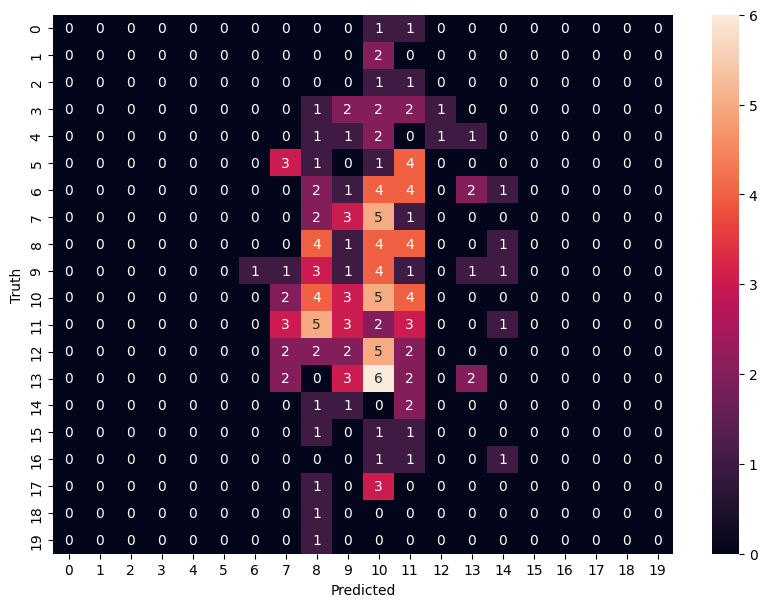

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        11
           8       0.13      0.29      0.18        14
           9       0.05      0.08      0.06        13
          10       0.10      0.28      0.15        18
          11       0.09      0.18      0.12        17
          12       0.00      0.00      0.00        13
          13       0.33      0.13      0.19        15
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00    

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### 2.2 Hyperparamter tuning

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

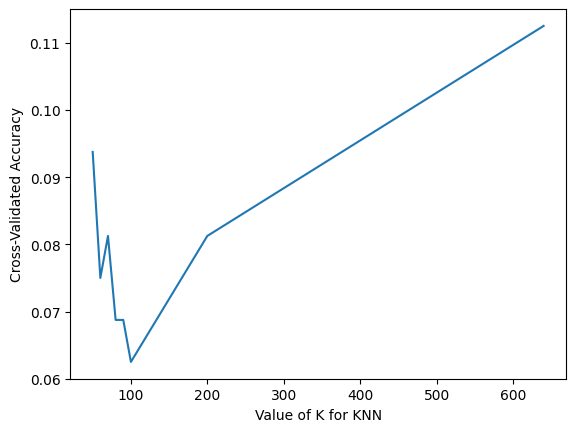

In [15]:
k_range = [50, 60, 70, 80, 90, 100, 200, 640]
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

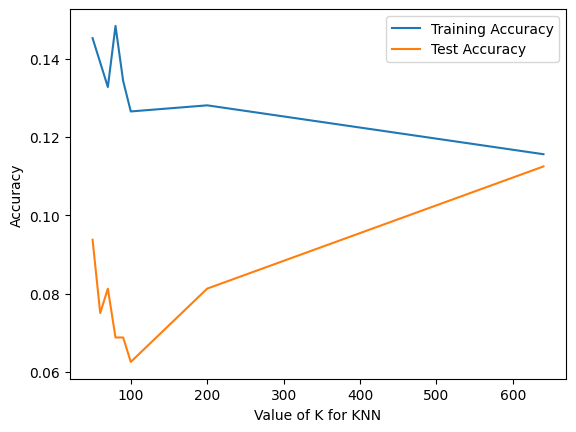

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

k_range = [50, 60, 70, 80, 90, 100, 200, 640]
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions on training set
    y_train_pred = knn.predict(X_train)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    # Predictions on test set
    y_test_pred = knn.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)

plt.plot(k_range, train_scores, label='Training Accuracy')
plt.plot(k_range, test_scores, label='Test Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
# Find the maximum accuracy score
max_score = max(scores)

# Find the index (position) of the maximum score
max_index = scores.index(max_score)

# Find the corresponding value of K for the peak
peak_k_value = k_range[max_index]

peak_indices = [i for i, score in enumerate(scores) if score == max_score]
peak_k_values = [k_range[index] for index in peak_indices]

print("best performing K-values:", peak_k_values)

best performing K-values: [640]


In [18]:
import pandas as pd

df_peak_values = pd.DataFrame({'K_values': peak_k_values, 'Accuracy': [scores[k_range.index(peak_k_value)] for peak_k_value in peak_k_values]})

df_peak_values.transpose()


,0
K_values,640.0000
Accuracy,0.1125


### 2.3 Cross validation

In [19]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the K-Fold Cross-Validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=640)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

Cross-Validation Scores: [0.1    0.125  0.1125 0.1    0.0875 0.175  0.075  0.0625 0.1125 0.1375]
Mean Accuracy: 0.10874999999999999
Standard Deviation of Accuracy: 0.030644126680328152


In [20]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the K-Fold Cross-Validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=200)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

Cross-Validation Scores: [0.0875 0.0875 0.1125 0.1    0.0625 0.1    0.0875 0.0875 0.125  0.0375]
Mean Accuracy: 0.08875000000000001
Standard Deviation of Accuracy: 0.02335192711533676


## 3. Train a SVM

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [22]:
C = 1.0  
gamma = 'scale' 

# 1. Train the SVM model
svm_model = SVC(C=C, gamma=gamma)
svm_model.fit(X_train, y_train)

# 2. Evaluate on Training Set
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# 3. Evaluate on Test Set
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.2953125
Test Accuracy: 0.06875


### 3.1 Normalize data

In [23]:
from sklearn.preprocessing import MinMaxScaler

C = 1.0  
gamma = 'scale'  

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the training and test data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(C=C, gamma=gamma)
svm_model.fit(X_train_normalized, y_train)

# Evaluate on Training Set
y_train_pred = svm_model.predict(X_train_normalized)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy (Normalized):", train_accuracy)

# Evaluate on Test Set
y_test_pred = svm_model.predict(X_test_normalized)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (Normalized):", test_accuracy)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy (Normalized): 0.2953125
Test Accuracy (Normalized): 0.075


### 3.2 Hyperparamter tuning

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

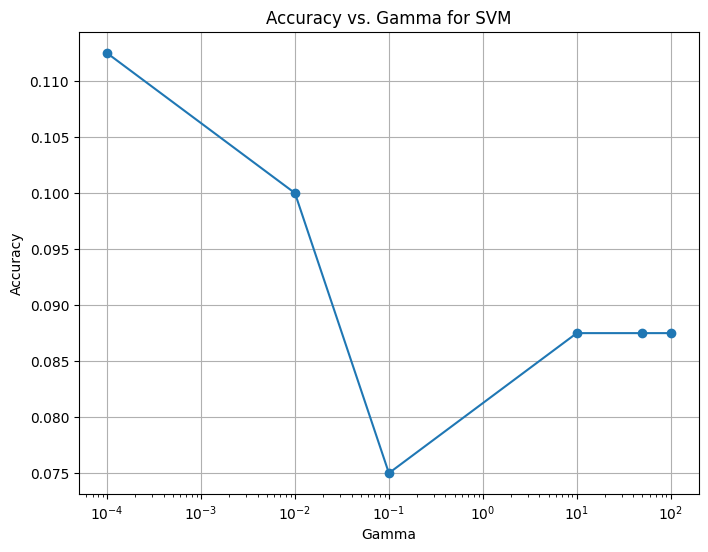

In [24]:
gamma_values = [0.0001, 0.01, 0.1, 10, 50, 100]

gamma_list = []
accuracy_list = []

for gamma in gamma_values:
    svm_clf = SVC(kernel='rbf', gamma=gamma)
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    gamma_list.append(gamma)
    accuracy_list.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(gamma_list, accuracy_list, marker='o')
plt.title('Accuracy vs. Gamma for SVM')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xscale('log') 
plt.grid(True)
plt.show()

In [25]:
gamma_values = [0.0001, 0.01, 0.1, 10, 50, 100,]

gamma_list = []
accuracy_list = []

for gamma in gamma_values:
    svm_clf = SVC(kernel='rbf', gamma=gamma)
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    gamma_list.append(gamma)
    accuracy_list.append(accuracy)

best_gamma = gamma_list[accuracy_list.index(max(accuracy_list))]
best_accuracy = max(accuracy_list)

print("Best gamma value:", best_gamma)
print("Corresponding accuracy:", best_accuracy)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

Best gamma value: 0.0001
Corresponding accuracy: 0.1125


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

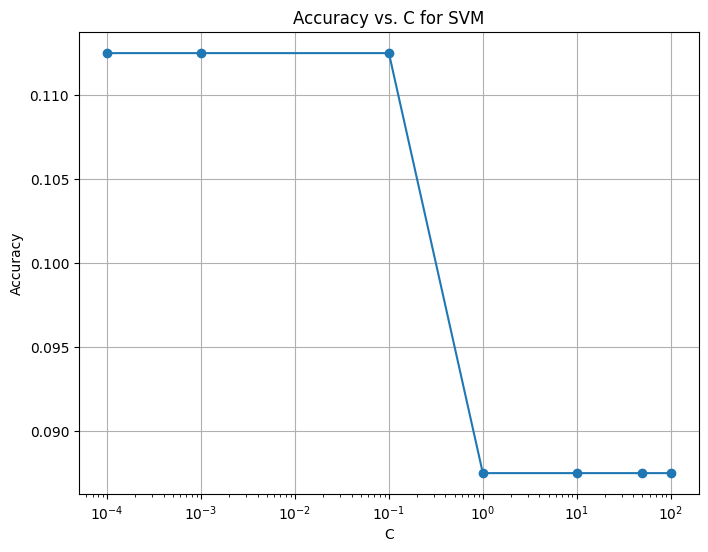

In [26]:
C_values = [0.0001, 0.001, 0.1, 1, 10, 50, 100]

C_list = []
accuracy_list = []

# Train SVM models with different C and gamma values
for C in C_values:
    svm_clf = SVC(kernel='rbf', C=C, gamma=10)
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    C_list.append(C)
    accuracy_list.append(accuracy)

# Plot the accuracy vs. gamma
plt.figure(figsize=(8, 6))
plt.plot(C_list, accuracy_list, marker='o')
plt.title('Accuracy vs. C for SVM')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')  
plt.grid(True)
plt.show()

In [27]:
C_values = [0.0001, 0.001, 0.1, 1, 10, 50, 100]

C_list = []
accuracy_list = []

for C in C_values:
    svm_clf = SVC(kernel='rbf', C=C, gamma=10)
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    C_list.append(C)
    accuracy_list.append(accuracy)

best_C = C_list[accuracy_list.index(max(accuracy_list))]
best_accuracy = max(accuracy_list)

print("Best C value:", best_C)
print("Corresponding accuracy:", best_accuracy)

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

Best C value: 0.0001
Corresponding accuracy: 0.1125


In [28]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma= 10)

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.0875


### 3.3 Cross validation

In [29]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.0001)

cv_scores_train = cross_val_score(svm_clf, X_train, y_train, cv=10)

print("Cross-Validation Scores (Training Data):", cv_scores_train)
print("Mean Accuracy (Training Data):", cv_scores_train.mean())
print("Standard Deviation of Accuracy (Training Data):", cv_scores_train.std())


svm_clf.fit(X_train, y_train)

test_accuracy = svm_clf.score(X_test, y_test)

print("\nAccuracy on Test Data:", test_accuracy)

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d ar

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

Cross-Validation Scores (Training Data): [0.125    0.125    0.109375 0.109375 0.109375 0.109375 0.109375 0.109375
 0.125    0.125   ]
Mean Accuracy (Training Data): 0.115625
Standard Deviation of Accuracy (Training Data): 0.007654655446197431

Accuracy on Test Data: 0.1125


In [30]:

svm_clf = SVC(kernel='rbf', C=1.0, gamma=10)

cv_scores_train = cross_val_score(svm_clf, X_train, y_train, cv=10)

print("Cross-Validation Scores (Training Data):", cv_scores_train)
print("Mean Accuracy (Training Data):", cv_scores_train.mean())
print("Standard Deviation of Accuracy (Training Data):", cv_scores_train.std())


svm_clf.fit(X_train, y_train)

test_accuracy = svm_clf.score(X_test, y_test)

print("\nAccuracy on Test Data:", test_accuracy)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

Cross-Validation Scores (Training Data): [0.046875 0.09375  0.109375 0.109375 0.078125 0.109375 0.140625 0.109375
 0.109375 0.109375]
Mean Accuracy (Training Data): 0.1015625
Standard Deviation of Accuracy (Training Data): 0.0234375


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy on Test Data: 0.0875


## 4. Train a logistic regression model

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
from sklearn.metrics import accuracy_score

# Predictions on the training set
y_train_pred = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy (Logistic Regression):", train_accuracy)

# Predictions on the test set
y_test_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (Logistic Regression):", test_accuracy)


Training Accuracy (Logistic Regression): 0.1703125
Test Accuracy (Logistic Regression): 0.05625


#### 4.1 Apply L2 regularization

In [33]:
# Initialize and train the logistic regression model with L2 regularization
logistic_regression_model = LogisticRegression(penalty='l2', C=0.01)
logistic_regression_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = logistic_regression_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy (Logistic Regression with L2 regularization):", train_accuracy)

# Predictions on the test set
y_test_pred = logistic_regression_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (Logistic Regression with L2 regularization):", test_accuracy)


Training Accuracy (Logistic Regression with L2 regularization): 0.1484375
Test Accuracy (Logistic Regression with L2 regularization): 0.09375


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
